# 📊 Exploratory Data Analysis (EDA): Retail Sales Dataset

This notebook provides an exploratory data analysis (EDA) of the Retail Sales dataset. The objective is to understand the dataset, clean it, and extract meaningful insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1️⃣ Load the Data
Let's load the dataset and take a look at its structure.

In [35]:
# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')  # Replace with your file name
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 2️⃣ Data Preprocessing and Cleaning
Converts the Date column to datetime format for better analysis.
Checks and removes missing values to ensure data integrity.
Displays summary statistics such as mean, min, and max for numerical columns.


In [36]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Checking for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Ensure data types are correct
print(df.dtypes)

# Basic statistical summary
df.describe()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


## 3️⃣ Sales Trends Over Time
Helps identify seasonal trends in sales. May seems to have the highest sales.
Useful for forecasting and inventory management.

C:\Users\Aishwarya'\AppData\Local\Temp\ipykernel_5992\379923732.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Total Amount'].sum().plot(figsize=(10, 5), title='Monthly Sales Trend', color='b')


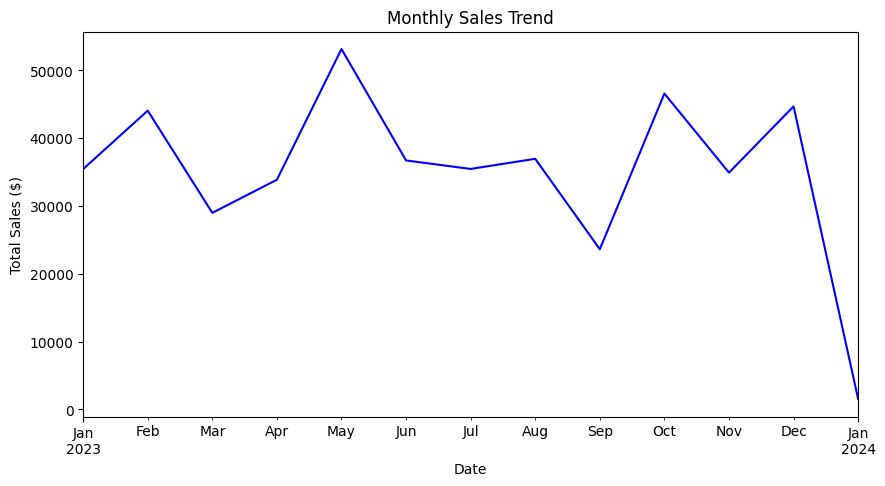

In [28]:
# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

# Plot monthly sales trend
df.resample('M')['Total Amount'].sum().plot(figsize=(10, 5), title='Monthly Sales Trend', color='b')
plt.ylabel("Total Sales ($)")
plt.xlabel("Date")
plt.show()


## 4️⃣ Best Performing Product Categories
Identifies top-selling product categories. Electronics and clothing provide the highest sales in the Product category.
Useful for marketing and inventory planning.

C:\Users\Aishwarya'\AppData\Local\Temp\ipykernel_5992\2064124019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


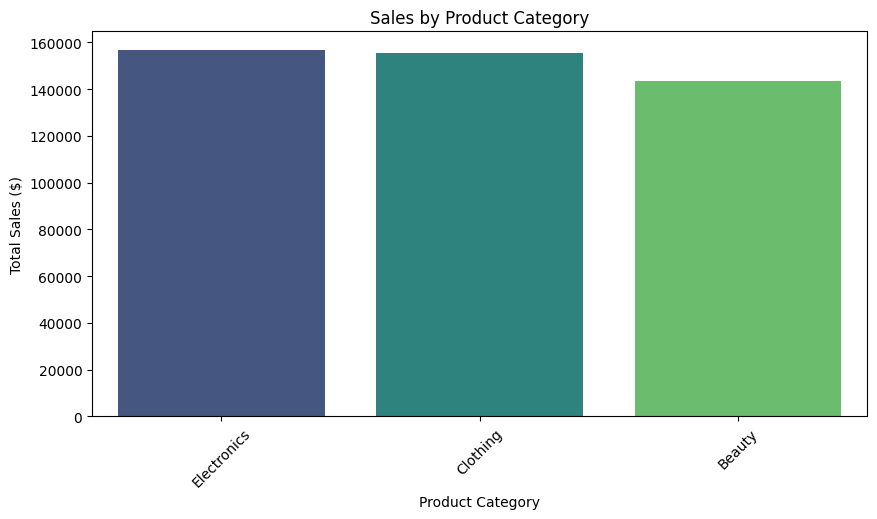

In [29]:
# Grouping sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot category-wise sales
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Sales by Product Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Product Category")
plt.show()


## 4️⃣ Customer Demographics Analysis
Gender-based sales distribution shows which gender contributes more to revenue. Female gender provides more to revenue. 
The age distribution helps target promotions and understand customer demographics.

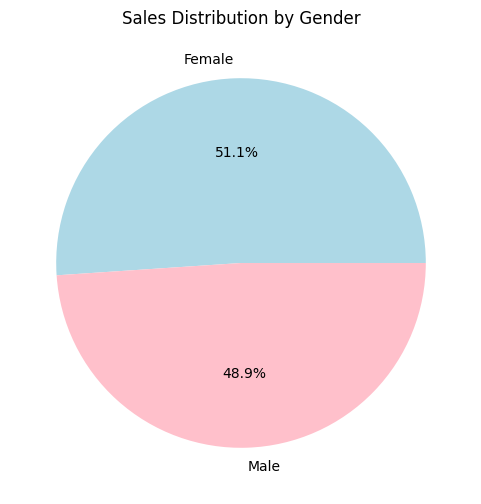

In [30]:
# Sales distribution by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6,6))
gender_sales.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], title="Sales Distribution by Gender")
plt.ylabel("")
plt.show()


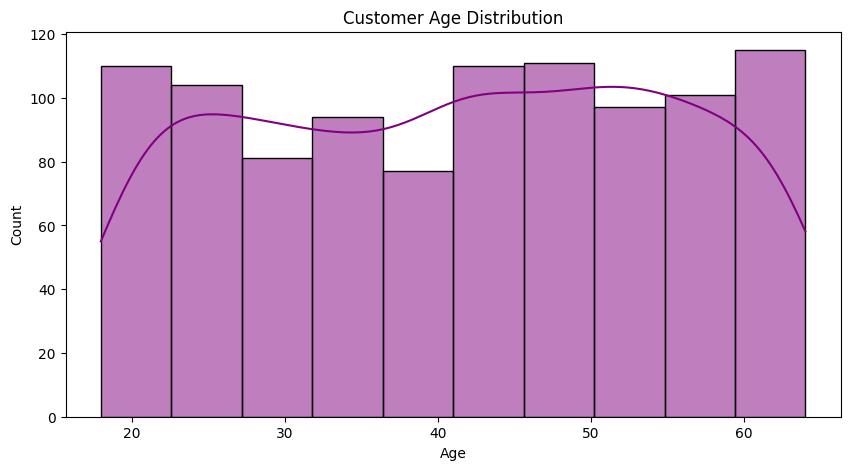

In [31]:
# Age distribution of customers
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=10, kde=True, color='purple')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## 5️⃣  Pricing Strategy & Revenue Analysis
Helps assess whether high-priced items are selling in high quantities. The plot shows that high-priced quantities is being sold in high quantities.
Guides pricing strategies.

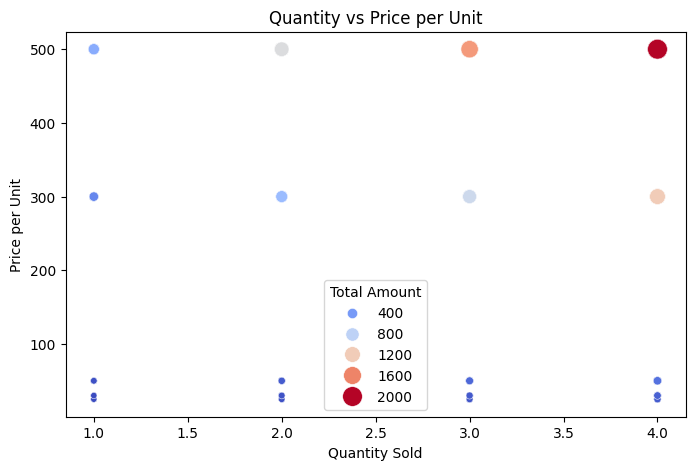

In [32]:
# Relationship between Quantity Sold and Price per Unit
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Quantity'], y=df['Price per Unit'], hue=df['Total Amount'], size=df['Total Amount'], sizes=(20, 200), palette='coolwarm')
plt.title("Quantity vs Price per Unit")
plt.xlabel("Quantity Sold")
plt.ylabel("Price per Unit")
plt.show()


7. Conclusion & Business Insights
The monthly sales trend helps in seasonal demand planning.
Product category sales highlight which products drive revenue the most.
Customer demographics (age & gender) guide marketing strategies.
Pricing vs quantity analysis informs discount or bundling decisions.